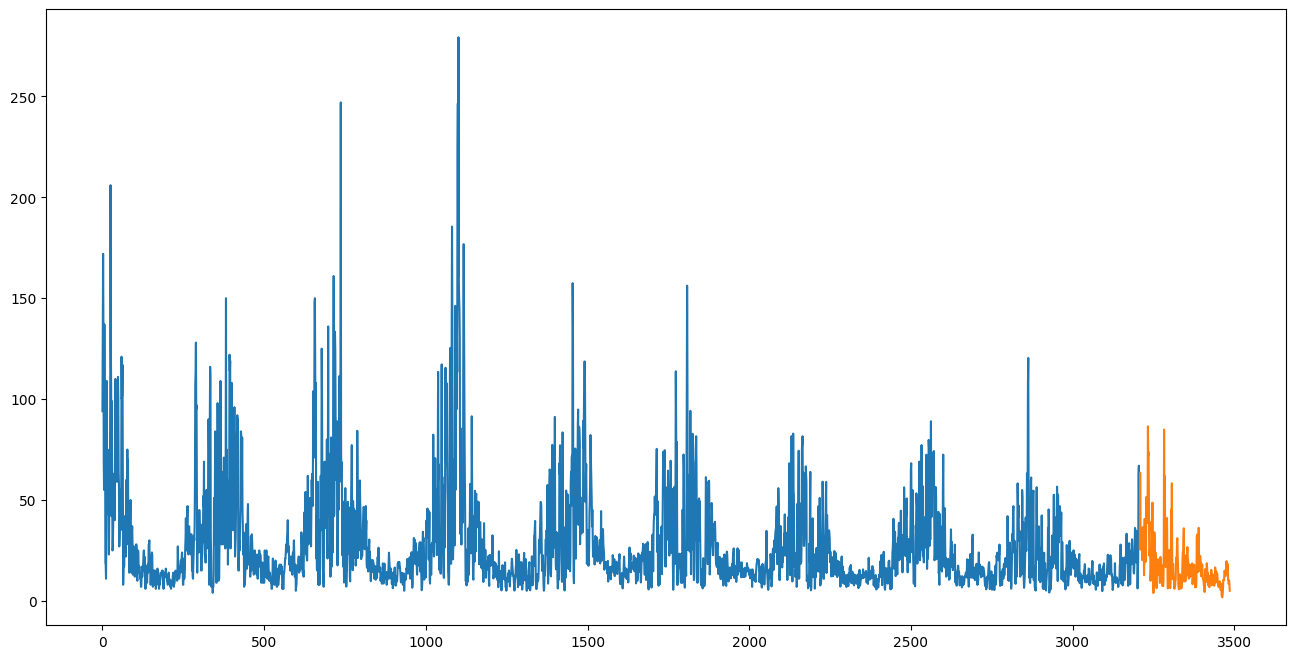

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

model_data = pd.read_csv("../../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08,shuffle=False)

plt.figure(figsize=[16,8])
plt.plot(y_train)
plt.plot(y_test)
plt.show()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error



def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 2500)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5)

    # Additional parameters
    criterion = trial.suggest_categorical('criterion',  {'friedman_mse', 'squared_error', 'poisson', 'absolute_error'})
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100)
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.1)
    n_jobs = trial.suggest_categorical('n_jobs', [1, 2, 4, 8])
    verbose = trial.suggest_categorical('verbose', [0, 1, 2])
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 0.5)
  

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        min_impurity_decrease=min_impurity_decrease,
        bootstrap=False,
        n_jobs=-1,
        random_state=42,
        verbose=verbose,
        ccp_alpha=ccp_alpha,
        max_samples=None
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize') 
improvement_threshold = 0.001
stale_count = 0

best_mse = float('inf')

mse_values = []

for _ in range(2000):
    study.optimize(objective, n_trials=1)

    if study.best_value < best_mse:
        best_mse = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    mse_values.append(best_mse)

    if stale_count >= 1600 or best_mse <= improvement_threshold:  
        break

best_params = study.best_params
best_mse = study.best_value

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_mse)



[I 2023-11-22 08:29:45,251] A new study created in memory with name: no-name-4dc22ead-653a-40f2-912b-04341fd68ff7
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s


building tree 1 of 603building tree 2 of 603
building tree 3 of 603
building tree 4 of 603

building tree 5 of 603
building tree 6 of 603
building tree 7 of 603
building tree 8 of 603
building tree 9 of 603
building tree 10 of 603
building tree 11 of 603
building tree 12 of 603
building tree 13 of 603
building tree 14 of 603
building tree 15 of 603
building tree 16 of 603
building tree 17 of 603
building tree 18 of 603
building tree 19 of 603
building tree 20 of 603
building tree 21 of 603
building tree 22 of 603
building tree 23 of 603
building tree 24 of 603
building tree 25 of 603
building tree 26 of 603
building tree 27 of 603
building tree 28 of 603
building tree 29 of 603
building tree 30 of 603
building tree 31 of 603
building tree 32 of 603
building tree 33 of 603
building tree 34 of 603
building tree 35 of 603
building tree 36 of 603
building tree 37 of 603
building tree 38 of 603
building tree 39 of 603
building tree 40 of 603
building tree 41 of 603
building tree 42 of 603
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 603 out of 603 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 603 out of 603 | elapsed:    0.0s finished
[I 2023-11-22 08:29:45,774] Trial 0 finished with value: 288.00225382144686 and parameters: {'n_estimators': 603, 'max_depth': 1212, 'min_samples_split': 92, 'min_samples_leaf': 86, 'max_features': 0.4555925166974423, 'min_weight_fraction_leaf': 0.020866429740117654, 'criterion': 'poisson', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.055281395769104236, 'n_jobs': 2, 'verbose': 2, 'ccp_alpha': 0.06003312474031569}. Best is trial 0 with value: 288.00225382144686.


building tree 355 of 603building tree 356 of 603

building tree 357 of 603
building tree 358 of 603
building tree 359 of 603
building tree 360 of 603
building tree 361 of 603
building tree 362 of 603
building tree 363 of 603
building tree 364 of 603
building tree 365 of 603
building tree 366 of 603
building tree 367 of 603
building tree 368 of 603
building tree 369 of 603
building tree 370 of 603
building tree 371 of 603
building tree 372 of 603
building tree 373 of 603
building tree 374 of 603
building tree 375 of 603
building tree 376 of 603
building tree 377 of 603
building tree 378 of 603
building tree 379 of 603
building tree 380 of 603
building tree 381 of 603
building tree 382 of 603
building tree 383 of 603
building tree 384 of 603
building tree 385 of 603
building tree 386 of 603
building tree 387 of 603
building tree 388 of 603
building tree 389 of 603
building tree 390 of 603
building tree 391 of 603
building tree 392 of 603
building tree 393 of 603
building tree 394 of 603


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 952 out of 952 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 952 out of 952 | elapsed:    0.0s finished
[I 2023-11-22 08:29:46,532] Trial 1 finished with value: 242.1654052353384 and parameters: {'n_estimators': 952, 'max_depth': 213, 'min_samples_split': 64, 'min_samples_leaf': 53, 'max_features': 0.

building tree 1 of 764
building tree 2 of 764
building tree 3 of 764
building tree 4 of 764
building tree 5 of 764
building tree 6 of 764
building tree 7 of 764
building tree 8 of 764
building tree 9 of 764
building tree 10 of 764
building tree 11 of 764
building tree 13 of 764
building tree 12 of 764
building tree 14 of 764
building tree 15 of 764
building tree 16 of 764
building tree 17 of 764
building tree 18 of 764
building tree 19 of 764
building tree 20 of 764
building tree 21 of 764
building tree 22 of 764
building tree 23 of 764
building tree 24 of 764
building tree 25 of 764
building tree 26 of 764
building tree 27 of 764
building tree 28 of 764
building tree 29 of 764
building tree 30 of 764
building tree 31 of 764
building tree 32 of 764
building tree 33 of 764
building tree 34 of 764
building tree 35 of 764
building tree 36 of 764
building tree 37 of 764
building tree 38 of 764
building tree 39 of 764
building tree 40 of 764
building tree 41 of 764
building tree 42 of 764
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 764 out of 764 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 764 out of 764 | elapsed:    0.0s finished
[I 2023-11-22 08:29:54,666] Trial 8 finished with value: 249.2441824496263 and parameters: {'n_estimators': 764, 'max_depth': 1426, 'min_samples_split': 23, 'min_samples_leaf': 13, 'max_features': 0.3499755259933528, 'min_weight_fraction_leaf': 0.4310656785280976, 'criterion': 'poisson', 'max_leaf_nodes': 56, 'min_impurity_decrease': 0.04339581753840669, 'n_jobs': 4, 'verbose': 2, 'ccp_alpha': 0.13597203595036905}. Best is trial 7 with value: 182.2661091745757.


building tree 1 of 52
building tree 2 of 52
building tree 3 of 52
building tree 4 of 52
building tree 5 of 52
building tree 6 of 52
building tree 7 of 52
building tree 8 of 52
building tree 9 of 52
building tree 10 of 52
building tree 11 of 52
building tree 12 of 52
building tree 13 of 52
building tree 14 of 52
building tree 15 of 52
building tree 16 of 52
building tree 17 of 52
building tree 18 of 52
building tree 19 of 52
building tree 20 of 52
building tree 21 of 52
building tree 22 of 52
building tree 23 of 52
building tree 24 of 52
building tree 25 of 52
building tree 26 of 52
building tree 27 of 52
building tree 28 of 52
building tree 29 of 52
building tree 30 of 52
building tree 31 of 52
building tree 32 of 52
building tree 33 of 52
building tree 34 of 52
building tree 35 of 52
building tree 36 of 52
building tree 37 of 52
building tree 38 of 52
building tree 39 of 52
building tree 40 of 52
building tree 41 of 52
building tree 42 of 52
building tree 43 of 52
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 442 out of 442 | elapsed:    2.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 442 out of 442 | elapsed:    0.0s finished
[I 2023-11-22 08:30:24,612] Trial 16 finished with value: 156.80471978670312 and parameters: {'n_estimators': 442, 'max_depth': 1925, 'min_samples_split': 24, 'min_samples_leaf': 41, 'max_features': 0.5161688511506051, 'min_weight_fraction_leaf': 0.492542080044004, 'criterion': 'absolute_error', 'max_leaf_nodes': 43, 'min_impurity_decrease': 0.08258239636643933, 'n_jobs': 2, 'verbose': 1, 'ccp_alpha': 0.3507650123775494}. Best is trial 16 with value: 156.80471978670312.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend

building tree 1 of 642
building tree 2 of 642
building tree 3 of 642
building tree 4 of 642
building tree 5 of 642
building tree 6 of 642
building tree 7 of 642
building tree 8 of 642
building tree 9 of 642
building tree 10 of 642
building tree 11 of 642
building tree 12 of 642
building tree 13 of 642
building tree 14 of 642
building tree 15 of 642
building tree 16 of 642
building tree 17 of 642
building tree 18 of 642
building tree 19 of 642
building tree 20 of 642
building tree 21 of 642
building tree 22 of 642
building tree 23 of 642
building tree 24 of 642
building tree 25 of 642
building tree 26 of 642
building tree 27 of 642
building tree 28 of 642
building tree 29 of 642
building tree 30 of 642
building tree 31 of 642
building tree 32 of 642
building tree 33 of 642
building tree 34 of 642
building tree 35 of 642
building tree 36 of 642
building tree 37 of 642
building tree 38 of 642
building tree 39 of 642
building tree 40 of 642
building tree 41 of 642
building tree 42 of 642
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.7s


building tree 188 of 642
building tree 189 of 642
building tree 190 of 642
building tree 191 of 642
building tree 192 of 642
building tree 193 of 642
building tree 194 of 642
building tree 195 of 642
building tree 196 of 642
building tree 197 of 642
building tree 198 of 642
building tree 199 of 642
building tree 200 of 642
building tree 201 of 642
building tree 202 of 642
building tree 203 of 642
building tree 204 of 642
building tree 205 of 642
building tree 206 of 642
building tree 207 of 642
building tree 208 of 642
building tree 209 of 642
building tree 210 of 642
building tree 211 of 642
building tree 212 of 642
building tree 213 of 642
building tree 214 of 642
building tree 215 of 642
building tree 216 of 642
building tree 217 of 642
building tree 218 of 642
building tree 219 of 642
building tree 220 of 642
building tree 221 of 642
building tree 222 of 642
building tree 223 of 642
building tree 224 of 642
building tree 225 of 642
building tree 226 of 642
building tree 227 of 642


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.9s


building tree 381 of 642
building tree 382 of 642
building tree 383 of 642
building tree 384 of 642
building tree 385 of 642
building tree 386 of 642
building tree 387 of 642
building tree 388 of 642
building tree 389 of 642
building tree 390 of 642
building tree 391 of 642
building tree 392 of 642
building tree 393 of 642
building tree 394 of 642
building tree 395 of 642
building tree 396 of 642
building tree 397 of 642
building tree 398 of 642
building tree 399 of 642
building tree 400 of 642
building tree 401 of 642
building tree 402 of 642
building tree 403 of 642
building tree 404 of 642
building tree 405 of 642
building tree 406 of 642
building tree 407 of 642
building tree 408 of 642
building tree 409 of 642
building tree 410 of 642
building tree 411 of 642
building tree 412 of 642
building tree 413 of 642
building tree 414 of 642
building tree 415 of 642
building tree 416 of 642
building tree 417 of 642
building tree 418 of 642
building tree 419 of 642
building tree 420 of 642


[Parallel(n_jobs=-1)]: Done 642 out of 642 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 642 out of 642 | elapsed:    0.0s finished
[I 2023-11-22 08:30:32,383] Trial 18 finished with value: 156.931407425138 and parameters: {'n_estimators': 642, 'max_depth': 1822, 'min_samples_split': 3, 'min_samples_leaf': 34, 'max_features': 0.5102061878126544, 'min_weight_fraction_leaf': 0.4852540644451333, 'criterion': 'absolute_error', 'max_leaf_nodes': 45, 'min_impurity_decrease': 0.07001801880053656, 'n_jobs': 4, 'verbose': 2, 'ccp_alpha': 0.33998881039109363}. Best is trial 17 with value: 156.78603264145784.
[I 2023-11-22 08:30:32,870] Trial 19 finished with value: 262.08058514800024 and parameters: {'n_estimators': 596, '

building tree 1 of 628building tree 2 of 628

building tree 3 of 628
building tree 4 of 628
building tree 5 of 628
building tree 6 of 628
building tree 7 of 628
building tree 8 of 628
building tree 9 of 628
building tree 10 of 628
building tree 11 of 628
building tree 12 of 628
building tree 13 of 628
building tree 14 of 628
building tree 15 of 628
building tree 16 of 628
building tree 17 of 628
building tree 18 of 628
building tree 19 of 628
building tree 20 of 628
building tree 21 of 628
building tree 22 of 628
building tree 23 of 628
building tree 24 of 628
building tree 25 of 628
building tree 26 of 628
building tree 27 of 628
building tree 28 of 628
building tree 29 of 628
building tree 30 of 628
building tree 31 of 628
building tree 32 of 628
building tree 33 of 628
building tree 34 of 628
building tree 35 of 628
building tree 36 of 628
building tree 37 of 628
building tree 38 of 628
building tree 39 of 628
building tree 40 of 628
building tree 41 of 628
building tree 42 of 628
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.5s


building tree 153 of 628
building tree 154 of 628
building tree 155 of 628
building tree 156 of 628
building tree 157 of 628
building tree 158 of 628
building tree 159 of 628
building tree 160 of 628
building tree 161 of 628
building tree 162 of 628
building tree 163 of 628
building tree 164 of 628
building tree 165 of 628
building tree 166 of 628
building tree 167 of 628
building tree 168 of 628
building tree 169 of 628
building tree 170 of 628
building tree 171 of 628
building tree 172 of 628
building tree 173 of 628
building tree 174 of 628
building tree 175 of 628
building tree 176 of 628
building tree 177 of 628
building tree 178 of 628
building tree 179 of 628
building tree 180 of 628
building tree 181 of 628
building tree 182 of 628
building tree 183 of 628
building tree 184 of 628
building tree 185 of 628
building tree 186 of 628
building tree 187 of 628
building tree 188 of 628
building tree 189 of 628
building tree 190 of 628
building tree 191 of 628
building tree 192 of 628


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.4s


building tree 381 of 628
building tree 382 of 628
building tree 383 of 628
building tree 384 of 628
building tree 385 of 628
building tree 386 of 628
building tree 387 of 628
building tree 388 of 628
building tree 389 of 628
building tree 390 of 628
building tree 391 of 628
building tree 392 of 628
building tree 393 of 628
building tree 394 of 628
building tree 395 of 628
building tree 396 of 628
building tree 397 of 628
building tree 398 of 628
building tree 399 of 628
building tree 400 of 628
building tree 401 of 628
building tree 402 of 628
building tree 403 of 628
building tree 404 of 628
building tree 405 of 628
building tree 406 of 628
building tree 407 of 628
building tree 408 of 628
building tree 409 of 628
building tree 410 of 628
building tree 411 of 628
building tree 412 of 628
building tree 413 of 628
building tree 414 of 628
building tree 415 of 628
building tree 416 of 628
building tree 417 of 628
building tree 418 of 628
building tree 419 of 628
building tree 420 of 628


[Parallel(n_jobs=-1)]: Done 628 out of 628 | elapsed:    2.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 628 out of 628 | elapsed:    0.0s finished
[I 2023-11-22 08:30:40,024] Trial 21 finished with value: 159.21014506032114 and parameters: {'n_estimators': 628, 'max_depth': 1836, 'min_samples_split': 3, 'min_samples_leaf': 29, 'max_features': 0.4967335033917733, 'min_weight_fraction_leaf': 0.4939912719538495, 'criterion': 'absolute_error', 'max_leaf_nodes': 44, 'min_impurity_decrease': 0.06947852481792842, 'n_jobs': 4, 'verbose': 2, 'ccp_alpha': 0.33633383655741217}. Best is trial 17 with value: 156.78603264145784.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 

building tree 1 of 860
building tree 2 of 860
building tree 3 of 860
building tree 4 of 860
building tree 5 of 860
building tree 6 of 860
building tree 7 of 860
building tree 8 of 860
building tree 9 of 860
building tree 10 of 860
building tree 11 of 860
building tree 12 of 860
building tree 13 of 860
building tree 14 of 860
building tree 15 of 860
building tree 16 of 860
building tree 17 of 860
building tree 18 of 860
building tree 19 of 860
building tree 20 of 860
building tree 21 of 860
building tree 22 of 860
building tree 23 of 860
building tree 24 of 860
building tree 25 of 860
building tree 26 of 860
building tree 27 of 860
building tree 28 of 860
building tree 29 of 860
building tree 30 of 860
building tree 31 of 860
building tree 32 of 860
building tree 33 of 860
building tree 34 of 860
building tree 35 of 860
building tree 36 of 860
building tree 37 of 860
building tree 38 of 860
building tree 39 of 860
building tree 40 of 860
building tree 41 of 860
building tree 42 of 860
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 183 of 860
building tree 184 of 860
building tree 185 of 860
building tree 186 of 860
building tree 187 of 860
building tree 188 of 860
building tree 189 of 860
building tree 190 of 860
building tree 191 of 860
building tree 192 of 860
building tree 193 of 860
building tree 194 of 860
building tree 195 of 860
building tree 196 of 860
building tree 197 of 860
building tree 198 of 860
building tree 199 of 860
building tree 200 of 860
building tree 201 of 860
building tree 202 of 860
building tree 203 of 860
building tree 204 of 860
building tree 205 of 860
building tree 206 of 860
building tree 207 of 860
building tree 208 of 860
building tree 209 of 860
building tree 210 of 860
building tree 211 of 860
building tree 212 of 860
building tree 213 of 860
building tree 214 of 860
building tree 215 of 860
building tree 216 of 860
building tree 217 of 860
building tree 218 of 860
building tree 219 of 860
building tree 220 of 860
building tree 221 of 860
building tree 222 of 860


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.9s


building tree 363 of 860building tree 364 of 860

building tree 365 of 860
building tree 366 of 860
building tree 367 of 860
building tree 368 of 860
building tree 369 of 860
building tree 370 of 860
building tree 371 of 860
building tree 372 of 860
building tree 373 of 860
building tree 374 of 860
building tree 375 of 860
building tree 376 of 860
building tree 377 of 860
building tree 378 of 860
building tree 379 of 860
building tree 380 of 860
building tree 381 of 860
building tree 382 of 860
building tree 383 of 860
building tree 384 of 860
building tree 385 of 860
building tree 386 of 860
building tree 387 of 860
building tree 388 of 860
building tree 389 of 860
building tree 390 of 860
building tree 391 of 860
building tree 392 of 860
building tree 393 of 860
building tree 394 of 860
building tree 395 of 860
building tree 396 of 860
building tree 397 of 860
building tree 398 of 860
building tree 399 of 860
building tree 400 of 860
building tree 401 of 860
building tree 402 of 860


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.5s


building tree 663 of 860
building tree 664 of 860
building tree 665 of 860
building tree 666 of 860
building tree 667 of 860
building tree 668 of 860
building tree 669 of 860
building tree 670 of 860
building tree 671 of 860
building tree 672 of 860
building tree 673 of 860
building tree 674 of 860
building tree 675 of 860
building tree 676 of 860
building tree 677 of 860
building tree 678 of 860
building tree 679 of 860
building tree 680 of 860
building tree 681 of 860
building tree 682 of 860
building tree 683 of 860
building tree 684 of 860
building tree 685 of 860
building tree 686 of 860
building tree 687 of 860
building tree 688 of 860
building tree 689 of 860
building tree 690 of 860
building tree 691 of 860
building tree 692 of 860
building tree 693 of 860
building tree 694 of 860
building tree 695 of 860
building tree 696 of 860
building tree 697 of 860
building tree 698 of 860
building tree 699 of 860
building tree 700 of 860
building tree 701 of 860
building tree 702 of 860


[Parallel(n_jobs=-1)]: Done 860 out of 860 | elapsed:    4.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 860 out of 860 | elapsed:    0.0s finished
[I 2023-11-22 08:30:45,267] Trial 22 finished with value: 154.58142886924867 and parameters: {'n_estimators': 860, 'max_depth': 1778, 'min_samples_split': 3, 'min_samples_leaf': 35, 'max_features': 0.5127168217956524, 'min_weight_fraction_leaf': 0.4678501747203554, 'criterion': 'absolute_error', 'max_leaf_nodes': 42, 'min_impurity_decrease': 0.06975390579762994, 'n_jobs': 4, 'verbose': 2, 'ccp_alpha': 0.3565858686277633}. Best is trial 22 with value: 154.58142886924867.


building tree 847 of 860
building tree 848 of 860
building tree 849 of 860
building tree 850 of 860
building tree 851 of 860
building tree 852 of 860
building tree 853 of 860
building tree 854 of 860
building tree 855 of 860
building tree 856 of 860
building tree 857 of 860
building tree 858 of 860
building tree 859 of 860
building tree 860 of 860


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 844
building tree 2 of 844
building tree 3 of 844
building tree 4 of 844
building tree 5 of 844
building tree 6 of 844
building tree 7 of 844
building tree 8 of 844
building tree 9 of 844
building tree 10 of 844
building tree 11 of 844
building tree 12 of 844
building tree 13 of 844
building tree 14 of 844
building tree 15 of 844
building tree 16 of 844
building tree 17 of 844
building tree 18 of 844
building tree 19 of 844
building tree 20 of 844
building tree 21 of 844
building tree 22 of 844
building tree 23 of 844
building tree 24 of 844
building tree 25 of 844
building tree 26 of 844
building tree 27 of 844
building tree 28 of 844
building tree 29 of 844
building tree 30 of 844
building tree 31 of 844
building tree 32 of 844
building tree 33 of 844
building tree 34 of 844
building tree 35 of 844
building tree 36 of 844
building tree 37 of 844
building tree 38 of 844
building tree 39 of 844
building tree 40 of 844
building tree 41 of 844
building tree 42 of 844
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.5s


building tree 195 of 844
building tree 196 of 844
building tree 197 of 844
building tree 198 of 844
building tree 199 of 844
building tree 200 of 844
building tree 201 of 844
building tree 202 of 844
building tree 203 of 844
building tree 204 of 844
building tree 205 of 844
building tree 206 of 844
building tree 207 of 844
building tree 208 of 844
building tree 209 of 844
building tree 210 of 844
building tree 211 of 844
building tree 212 of 844
building tree 213 of 844
building tree 214 of 844
building tree 215 of 844
building tree 216 of 844
building tree 217 of 844
building tree 218 of 844
building tree 219 of 844
building tree 220 of 844
building tree 221 of 844
building tree 222 of 844
building tree 223 of 844
building tree 224 of 844
building tree 225 of 844
building tree 226 of 844
building tree 227 of 844
building tree 228 of 844
building tree 229 of 844
building tree 230 of 844
building tree 231 of 844
building tree 232 of 844
building tree 233 of 844
building tree 234 of 844


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.4s


building tree 391 of 844
building tree 392 of 844
building tree 393 of 844
building tree 394 of 844
building tree 395 of 844
building tree 396 of 844
building tree 397 of 844
building tree 398 of 844
building tree 399 of 844
building tree 400 of 844
building tree 401 of 844
building tree 402 of 844
building tree 403 of 844
building tree 404 of 844
building tree 405 of 844
building tree 406 of 844
building tree 407 of 844
building tree 408 of 844
building tree 409 of 844
building tree 410 of 844
building tree 411 of 844
building tree 412 of 844
building tree 413 of 844
building tree 414 of 844
building tree 415 of 844
building tree 416 of 844
building tree 417 of 844
building tree 418 of 844
building tree 419 of 844
building tree 420 of 844
building tree 421 of 844
building tree 422 of 844
building tree 423 of 844
building tree 424 of 844
building tree 425 of 844
building tree 426 of 844
building tree 427 of 844
building tree 428 of 844
building tree 429 of 844
building tree 430 of 844


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    2.6s


building tree 679 of 844
building tree 680 of 844
building tree 681 of 844
building tree 682 of 844
building tree 683 of 844
building tree 684 of 844
building tree 685 of 844
building tree 686 of 844
building tree 687 of 844
building tree 688 of 844
building tree 689 of 844
building tree 690 of 844
building tree 691 of 844
building tree 692 of 844
building tree 693 of 844
building tree 694 of 844
building tree 695 of 844
building tree 696 of 844
building tree 697 of 844
building tree 698 of 844
building tree 699 of 844
building tree 700 of 844
building tree 701 of 844
building tree 702 of 844
building tree 703 of 844
building tree 704 of 844
building tree 705 of 844
building tree 706 of 844
building tree 707 of 844
building tree 708 of 844
building tree 709 of 844
building tree 710 of 844
building tree 711 of 844
building tree 712 of 844
building tree 713 of 844
building tree 714 of 844
building tree 715 of 844
building tree 716 of 844
building tree 717 of 844
building tree 718 of 844


[Parallel(n_jobs=-1)]: Done 844 out of 844 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 844 out of 844 | elapsed:    0.0s finished
[I 2023-11-22 08:30:49,241] Trial 23 finished with value: 157.04460198016278 and parameters: {'n_estimators': 844, 'max_depth': 1721, 'min_samples_split': 26, 'min_samples_leaf': 16, 'max_features': 0.43266117786542035, 'min_weight_fraction_leaf': 0.45444095348791075, 'criterion': 'absolute_error', 'max_leaf_nodes': 37, 'min_impurity_decrease': 0.08747641421267516, 'n_jobs': 4, 'verbose': 2, 'ccp_alpha': 0.38735930319521966}. Best is trial 22 with value: 154.58142886924867.
[Parallel(n_jobs=-1)]: Using backend ThreadingBac

building tree 1 of 892
building tree 2 of 892
building tree 3 of 892
building tree 4 of 892
building tree 5 of 892
building tree 6 of 892
building tree 7 of 892
building tree 8 of 892
building tree 9 of 892
building tree 10 of 892
building tree 11 of 892
building tree 12 of 892
building tree 13 of 892
building tree 14 of 892
building tree 15 of 892
building tree 16 of 892
building tree 17 of 892
building tree 18 of 892
building tree 19 of 892
building tree 20 of 892
building tree 21 of 892
building tree 22 of 892
building tree 23 of 892
building tree 24 of 892
building tree 25 of 892
building tree 26 of 892
building tree 27 of 892
building tree 28 of 892
building tree 29 of 892
building tree 30 of 892
building tree 31 of 892
building tree 32 of 892
building tree 33 of 892
building tree 34 of 892
building tree 35 of 892
building tree 36 of 892
building tree 37 of 892
building tree 38 of 892
building tree 39 of 892
building tree 40 of 892
building tree 41 of 892
building tree 42 of 892
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.7s


building tree 186 of 892
building tree 187 of 892
building tree 188 of 892
building tree 189 of 892
building tree 190 of 892
building tree 191 of 892
building tree 192 of 892
building tree 193 of 892
building tree 194 of 892
building tree 195 of 892
building tree 196 of 892
building tree 197 of 892
building tree 198 of 892
building tree 199 of 892
building tree 200 of 892
building tree 201 of 892
building tree 202 of 892
building tree 203 of 892
building tree 204 of 892
building tree 205 of 892
building tree 206 of 892
building tree 207 of 892
building tree 208 of 892
building tree 209 of 892
building tree 210 of 892
building tree 211 of 892
building tree 212 of 892
building tree 213 of 892
building tree 214 of 892
building tree 215 of 892
building tree 216 of 892
building tree 217 of 892
building tree 218 of 892
building tree 219 of 892
building tree 220 of 892
building tree 221 of 892
building tree 222 of 892
building tree 223 of 892
building tree 224 of 892
building tree 225 of 892


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.9s


building tree 375 of 892
building tree 376 of 892
building tree 377 of 892
building tree 378 of 892
building tree 379 of 892
building tree 380 of 892
building tree 381 of 892
building tree 382 of 892
building tree 383 of 892
building tree 384 of 892
building tree 385 of 892
building tree 386 of 892
building tree 387 of 892
building tree 388 of 892
building tree 389 of 892
building tree 390 of 892
building tree 391 of 892
building tree 392 of 892
building tree 393 of 892
building tree 394 of 892
building tree 395 of 892
building tree 396 of 892
building tree 397 of 892
building tree 398 of 892
building tree 399 of 892
building tree 400 of 892
building tree 401 of 892
building tree 402 of 892
building tree 403 of 892
building tree 404 of 892
building tree 405 of 892
building tree 406 of 892
building tree 407 of 892
building tree 408 of 892
building tree 409 of 892
building tree 410 of 892
building tree 411 of 892building tree 412 of 892

building tree 413 of 892
building tree 414 of 892


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.5s


building tree 668 of 892
building tree 669 of 892
building tree 670 of 892
building tree 671 of 892
building tree 672 of 892
building tree 673 of 892
building tree 674 of 892
building tree 675 of 892
building tree 676 of 892
building tree 677 of 892
building tree 678 of 892
building tree 679 of 892
building tree 680 of 892
building tree 681 of 892
building tree 682 of 892
building tree 683 of 892
building tree 684 of 892
building tree 685 of 892
building tree 686 of 892
building tree 687 of 892
building tree 688 of 892
building tree 689 of 892
building tree 690 of 892
building tree 691 of 892
building tree 692 of 892
building tree 693 of 892
building tree 694 of 892
building tree 695 of 892
building tree 696 of 892
building tree 697 of 892
building tree 698 of 892
building tree 699 of 892
building tree 700 of 892
building tree 701 of 892
building tree 702 of 892
building tree 703 of 892
building tree 704 of 892
building tree 705 of 892
building tree 706 of 892
building tree 707 of 892


[W 2023-11-22 08:30:53,900] Trial 24 failed with parameters: {'n_estimators': 892, 'max_depth': 2238, 'min_samples_split': 13, 'min_samples_leaf': 46, 'max_features': 0.5754772905210354, 'min_weight_fraction_leaf': 0.3849118615379943, 'criterion': 'absolute_error', 'max_leaf_nodes': 63, 'min_impurity_decrease': 0.0767682176817828, 'n_jobs': 4, 'verbose': 2, 'ccp_alpha': 0.28594462716591695} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\48516\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\48516\AppData\Local\Temp\ipykernel_18336\2529661443.py", line 41, in objective
    model.fit(X_train, y_train)
  File "c:\Users\48516\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^

building tree 774 of 892
building tree 775 of 892


KeyboardInterrupt: 

Średni błąd kwadratowy (MSE): 208.97774480871092
r2 score: -28.54%


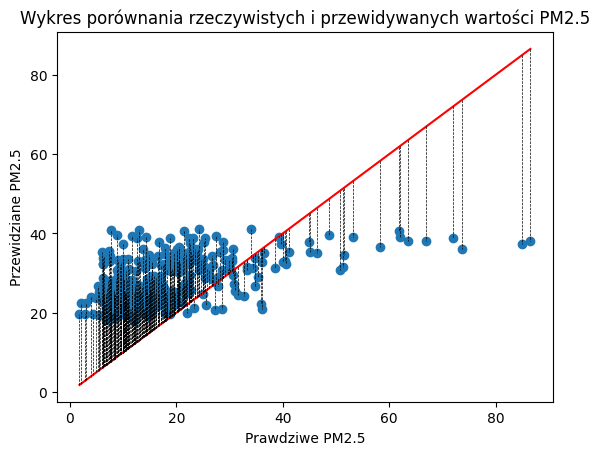

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
0,10.46,25.162706,-14.702706
1,10.38,22.539422,-12.159422
2,10.29,25.162706,-14.872706
3,6.89,20.383278,-13.493278
4,7.56,20.729692,-13.169692
...,...,...,...
344,9.90,30.580726,-20.680726
345,8.40,23.223996,-14.823996
346,10.20,28.259028,-18.059028
347,8.40,24.420124,-16.020124


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

model = RandomForestRegressor(**best_params,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"r2 score: {percent_match:.2f}%")

y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results



